Student Details

Name: Fergus Mc Hale

ID: 18203485

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

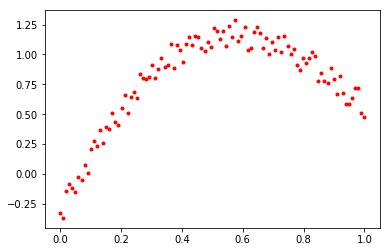

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

In [13]:
k = points/10

In [14]:
print("10 Fold Cross Cross Validation Points :", k)

10 Fold Cross Cross Validation Points : 10.0


Below is an implementation of linear regression with regularization

In [17]:
# Wreg = (Z^TZ+lambaI)-1 Z^Ty
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [18]:
# Wlin - (Z^TZ)-1 Z^Ty
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [9]:
ein=[]
eout=[]
weights=[]
lambdas = [0,0.0001,0.01,1] #Lamba is infinite
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


In [10]:
print(ein)

[0.7185693360068193, 0.06849544079106615, 0.0734749500242904, 0.1995941720485295]


In [11]:
print(eout)

[0.627206849100692, 0.047805044830375204, 0.05678824189001422, 0.12420999574113951]


In [12]:
print(weights)

[array([-2.81370565e+00,  8.09095407e+01, -6.85247560e+02, -6.12290770e+02,
        5.11541114e+04, -3.64534170e+05,  1.17607500e+06, -1.55468795e+06,
       -1.52982544e+06,  9.65657106e+06, -1.70200832e+07,  1.40169138e+07,
       -4.09776076e+05, -1.16234206e+07,  1.17284901e+07, -4.28818166e+06,
        8.46810569e+05, -1.95079395e+06,  2.12414751e+06, -2.47057610e+06,
        1.71286765e+06, -7.76452218e+05,  2.37371002e+06, -5.48181779e+05,
       -4.94553722e+05, -3.41676517e+05, -1.46243683e+06, -2.22920682e+05,
       -1.01656933e+06,  1.71022849e+06,  8.84667696e+05,  1.82525693e+06,
        1.91343034e+04,  3.09731281e+05, -1.73517069e+06, -1.92181655e+06,
       -3.02548468e+05, -2.33840652e+05,  6.55637491e+05,  6.11776570e+05,
        1.49213574e+06, -3.06622177e+05,  6.40726214e+05, -1.24295252e+06,
        8.83447096e+05, -1.09300172e+06, -4.30066546e+05,  3.95142753e+05,
       -5.02611122e+05,  1.33514499e+06, -6.05247690e+05]), array([-0.32531419,  4.99194791, -3.152

Error does not exceed Hoeffding
Error does not exceed VC


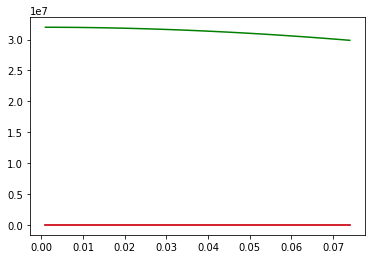

In [22]:
N = 100
error_diff = abs(np.array(ein)-np.array(eout))
epsilons = np.arange(0.001,0.075,0.001)
prob_epsilon=[]
for e in epsilons:
        prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
plt.plot(epsilons, prob_epsilon)

hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
vc = [4*(2*N)**3*math.exp(-(N/8)*e**2) for e in epsilons]

print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")
plt.plot(epsilons, hoef,'r')
plt.plot(epsilons, vc, 'g')
plt.yscale('log')
plt.show()